## Введение

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. 

## Описание данных

- <u>train.csv</u> -  информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
- <u>test.csv</u> -  информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных.
- <u>sample_submit.csv</u> - файл предсказаний в правильном формате.
- **instance_id**- идентификатор трека в тестовом наборе.
-  **music_genre** - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

## Описание полей данных


- **instance_id** -Уникальный идентификатор трека
- **track_name** - Название трека
- **acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- **danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- **duration_ms** - Продолжительность трека в миллисекундах.
- **energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- **instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
key - базовый ключ (нота) произведения
- **liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- **loudness** - Общая громкость трека в децибелах (дБ)
- **mode** - Указывает на модальность (мажорную или минорную) трека
- **speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- **tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
obtained_date - дата загрузки в сервис
- **valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- **music_genre** - Музыкальный жанр трека

## Импорт библиотек

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Загрузка и анализ данных

In [2]:

# Загрузка данных из файлов
train_data = pd.read_csv("kaggle_music_genre_train.csv")
test_data = pd.read_csv("kaggle_music_genre_test.csv")
sample_submission = pd.read_csv("sample_submit.csv")

# Вывод первых 5 строк из каждой таблицы для предварительного просмотра
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nSample Submission Data:")
print(sample_submission.head())

# Выведем информацию о данных для обучающего набора
print("\nИнформация о данных в обучающем наборе:")
print(train_data.info())

# Выведем информацию о данных для тестового набора
print("\nИнформация о данных в тестовом наборе:")
print(test_data.info())

# Выведем информацию о данных в файле sample_submission.csv
print("\nИнформация о данных в файле sample_submission.csv:")
print(sample_submission.info())

Train Data:
   instance_id                  track_name  acousticness  danceability  \
0      25143.0                  Highwayman        0.4800         0.670   
1      26091.0       Toes Across The Floor        0.2430         0.452   
2      87888.0       First Person on Earth        0.2280         0.454   
3      77021.0  No Te Veo - Digital Single        0.0558         0.847   
4      20852.0             Chasing Shadows        0.2270         0.742   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0     182653.0   0.351          0.017600   D     0.115   -16.842  Major   
1     187133.0   0.670          0.000051   A     0.108    -8.392  Minor   
2     173448.0   0.804          0.000000   E     0.181    -5.225  Minor   
3     255987.0   0.873          0.000003  G#     0.325    -4.805  Minor   
4     195333.0   0.575          0.000002   C     0.176    -5.550  Major   

   speechiness    tempo obtained_date  valence  music_genre  
0       0.0463  101.384       

## Предварительная обработка данных:

In [3]:
# Печать уникальных значений в столбцах key, mode и tempo
print("Уникальные значения в столбце key:")
print(train_data['key'].unique())
print("Уникальные значения в столбце mode:")
print(train_data['mode'].unique())
print("Уникальные значения в столбце tempo:")
print(train_data['tempo'].unique())

print(train_data.columns)
print(train_data.head())
# Вывести список столбцов в тестовом наборе данных
print(test_data.columns)

Уникальные значения в столбце key:
['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']
Уникальные значения в столбце mode:
['Major' 'Minor' nan]
Уникальные значения в столбце tempo:
[101.384 113.071  80.98  ...  87.413  76.879 146.803]
Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence',
       'music_genre'],
      dtype='object')
   instance_id                  track_name  acousticness  danceability  \
0      25143.0                  Highwayman        0.4800         0.670   
1      26091.0       Toes Across The Floor        0.2430         0.452   
2      87888.0       First Person on Earth        0.2280         0.454   
3      77021.0  No Te Veo - Digital Single        0.0558         0.847   
4      20852.0             Chasing Shadows        0.2270         0.742   

   duration_ms  energy  instrumentalness key  liv

Проверяем на пропуски

In [4]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64
instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64


In [5]:
# Приведение столбца 'instance_id' к целочисленному типу
test_data['instance_id'] = test_data['instance_id'].astype(int)
train_data['instance_id'] = train_data['instance_id'].astype(int)

In [6]:
from sklearn.impute import SimpleImputer

# Столбцы для обработки
columns_with_missing_values = ['key', 'mode', 'tempo']

# Создание объекта SimpleImputer для категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропущенных значений в категориальных столбцах
train_data[columns_with_missing_values] = categorical_imputer.fit_transform(train_data[columns_with_missing_values])
test_data[columns_with_missing_values] = categorical_imputer.transform(test_data[columns_with_missing_values])

# Создание объекта SimpleImputer для числовых данных
numerical_imputer = SimpleImputer(strategy='mean')

# Заполнение пропущенных значений в числовых столбцах
train_data[['duration_ms', 'tempo']] = numerical_imputer.fit_transform(train_data[['duration_ms', 'tempo']])
test_data[['duration_ms', 'tempo']] = numerical_imputer.transform(test_data[['duration_ms', 'tempo']])

print(train_data.isnull().sum())
print(test_data.isnull().sum())

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64
instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64


### Применение OneHotEncoder

In [7]:
# Выбираем категориальные столбцы
categorical_cols = ['key', 'mode']

# Создаем объект OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop=None)

# Применяем OneHotEncoder ко всему набору данных
encoded_data_train = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))
encoded_data_test = pd.DataFrame(encoder.transform(test_data[categorical_cols]), 
                                  columns=encoder.get_feature_names_out(categorical_cols))

# Добавляем новые столбцы к данным
train_data = pd.concat([train_data, encoded_data_train], axis=1)
test_data = pd.concat([test_data, encoded_data_test], axis=1)

# Удаляем исходные категориальные столбцы
train_data.drop(categorical_cols, axis=1, inplace=True)
test_data.drop(categorical_cols, axis=1, inplace=True)

In [8]:
print(train_data.columns)
print(train_data.head())
# Вывести список столбцов в тестовом наборе данных
print(test_data.columns)

Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')
   instance_id                  track_name  acousticness  danceability  \
0        25143                  Highwayman        0.4800         0.670   
1        26091       Toes Across The Floor        0.2430         0.452   
2        87888       First Person on Earth        0.2280         0.454   
3        77021  No Te Veo - Digital Single        0.0558         0.847   
4        20852             Chasing Shadows        0.2270         0.742   

   duration_ms  energy  instrumentalness  liveness  loudness  speechiness  \
0     182653.0   0.351          0.017600     0.115   -16.842       0.0463  

### Построение гистограмм

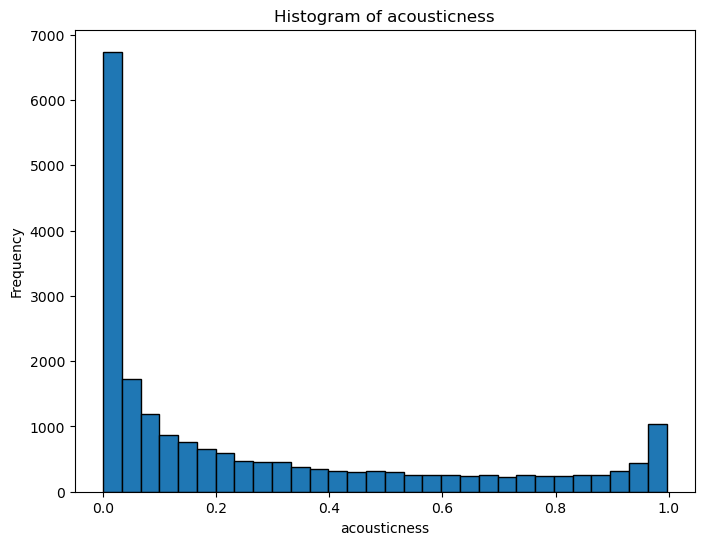

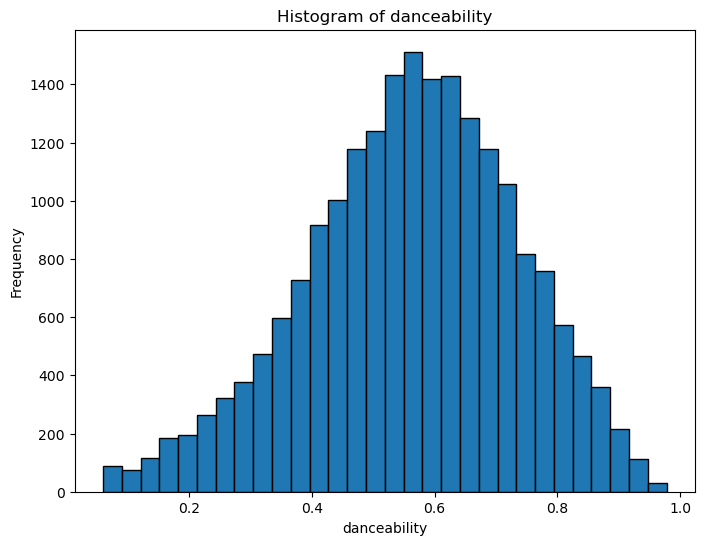

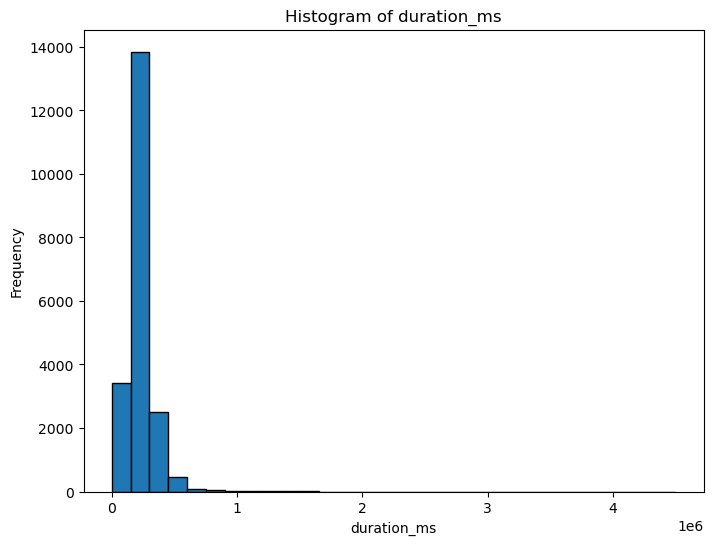

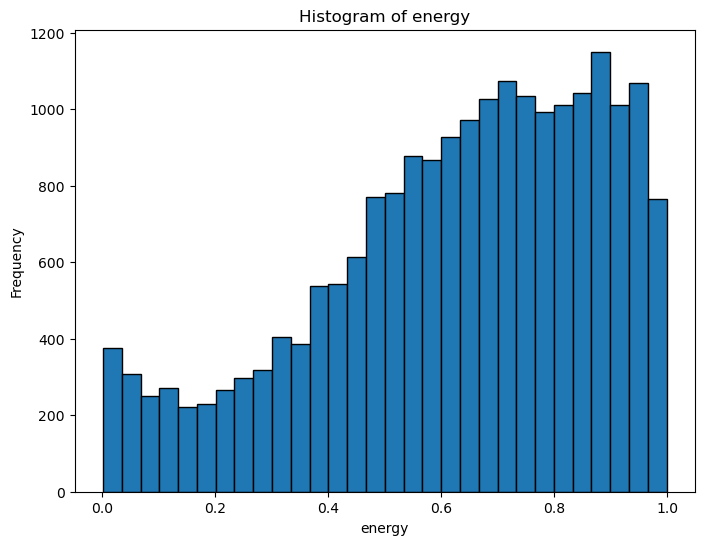

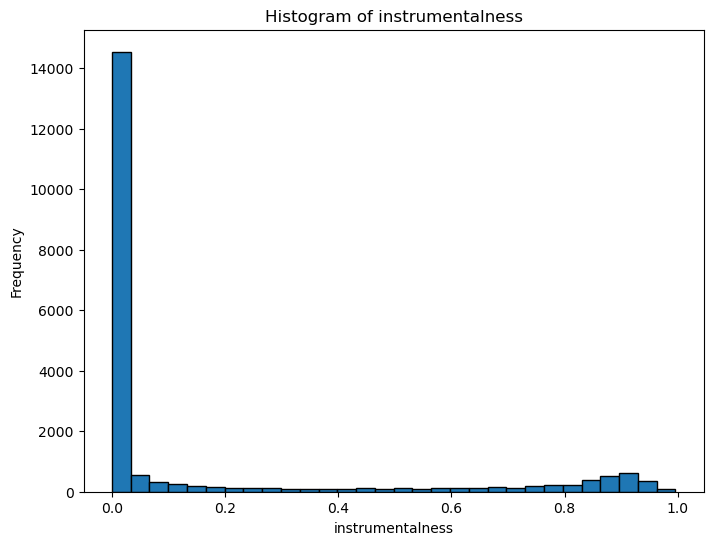

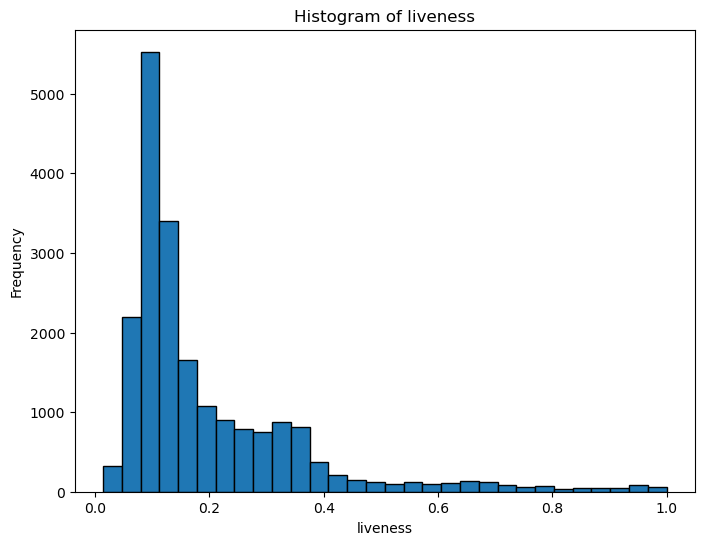

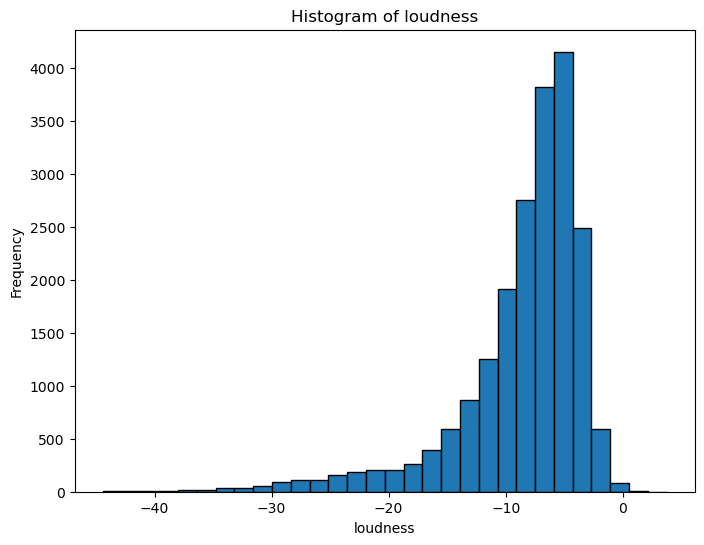

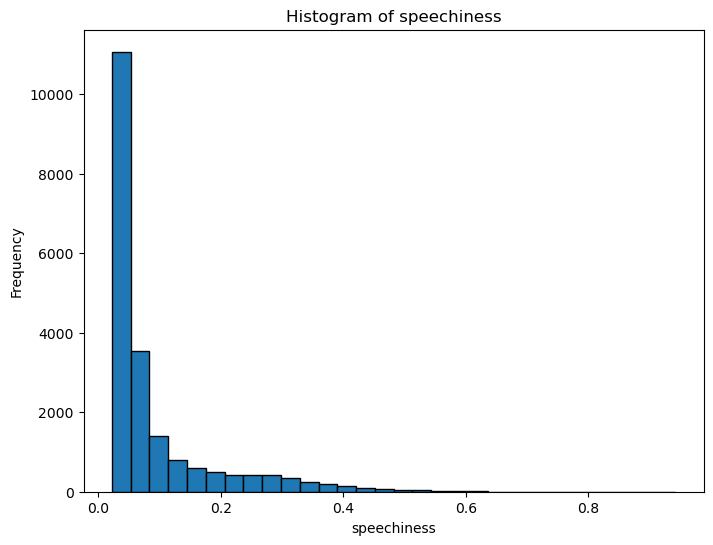

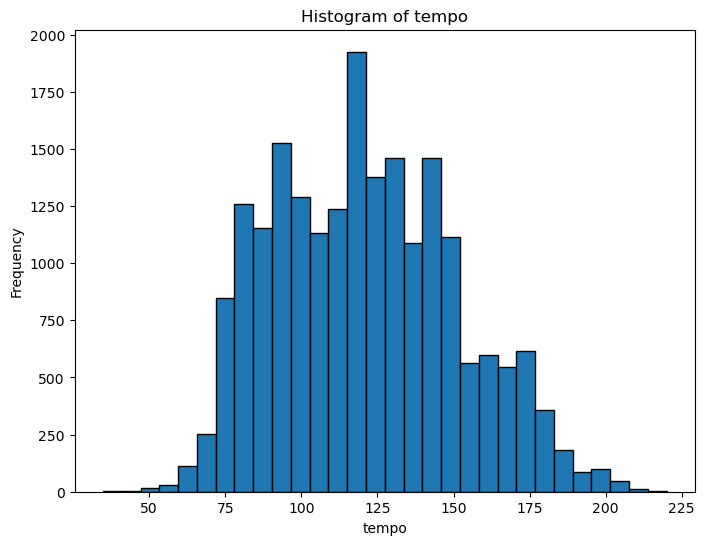

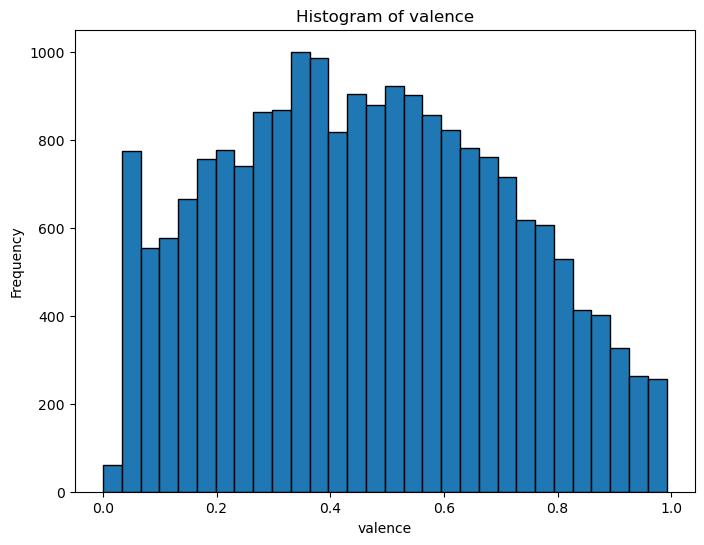

       acousticness  danceability   duration_ms        energy  \
count  20394.000000  20394.000000  2.039400e+04  20394.000000   
mean       0.274783      0.561983  2.203754e+05      0.625276   
std        0.321643      0.171898  1.267283e+05      0.251238   
min        0.000000      0.060000 -1.000000e+00      0.001010   
25%        0.015200      0.451000  1.775170e+05      0.470000   
50%        0.120000      0.570000  2.195330e+05      0.666000   
75%        0.470000      0.683000  2.660000e+05      0.830000   
max        0.996000      0.978000  4.497994e+06      0.999000   

       instrumentalness      liveness      loudness   speechiness  \
count      20394.000000  20394.000000  20394.000000  20394.000000   
mean           0.159989      0.198540     -8.552998      0.091352   
std            0.306503      0.166742      5.499917      0.097735   
min            0.000000      0.013600    -44.406000      0.022300   
25%            0.000000      0.097300    -10.255750      0.035600   


In [9]:
# Выбор числовых признаков
numeric_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Построение гистограмм для каждого числового признака
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.hist(train_data[feature], bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Вывод основных статистик числовых признаков
print(train_data[numeric_features].describe())

Была проведена подготовка данных проекта. Исходные данные о музыкальных треках были загружены из файлов. Обнаружены пропущенные значения в столбцах с информацией о ключе (key), моде (mode) и темпе (tempo), которые были успешно заполнены, обеспечив полноту данных. Теперь данные готовы для дальнейшего анализа и использования в проекте.

Также мы видим отрицательные значения в Duration ms. Необходимо заменить отрицательные значения на положительные по модулю.

In [10]:
train_data['duration_ms'] = train_data['duration_ms'].abs()
test_data['duration_ms'] = test_data['duration_ms'].abs()
# Проверка после замены отрицательных значений в столбце duration_ms
print("Проверка после замены отрицательных значений в столбце duration_ms:")
print("Train Data:", (train_data['duration_ms'] < 0).sum())
print("Test Data:", (test_data['duration_ms'] < 0).sum())

Проверка после замены отрицательных значений в столбце duration_ms:
Train Data: 0
Test Data: 0


In [11]:
# Проверка после замены отрицательных значений в столбце duration_ms
print("Проверка после замены отрицательных значений в столбце duration_ms:")
print("Train Data:", (train_data['duration_ms'] < 0).sum())
print("Test Data:", (test_data['duration_ms'] < 0).sum())

# Проверим доступные столбцы в train_data и test_data
print("Столбцы в train_data:", train_data.columns)
print("Столбцы в test_data:", test_data.columns)

# Проверим наличие 'music_genre' в train_data и test_data
if 'music_genre' in train_data.columns and 'music_genre' in test_data.columns:
    # Применим one-hot encoding для 'obtained_date' и 'music_genre'
    train_data = pd.get_dummies(train_data, columns=['obtained_date', 'music_genre'], dummy_na=True)
    test_data = pd.get_dummies(test_data, columns=['obtained_date', 'music_genre'], dummy_na=True)
else:
    print("Столбец 'music_genre' не найден в train_data или test_data.")

Проверка после замены отрицательных значений в столбце duration_ms:
Train Data: 0
Test Data: 0
Столбцы в train_data: Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')
Столбцы в test_data: Index(['instance_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor'],
      dtype='object')
Столбец 'music_genre' не найден в train_data или test_data.


### Вывод по проделанной работе:
 Обработка пропущенных значений:

 * Обнаружены пропущенные значения в столбцах 'key', 'mode' и 'tempo'.
 * Пропущенные значения в столбце 'tempo' были заполнены средними значениями.
 * Пропущенные значения в столбцах 'key' и 'mode' были заполнены наиболее часто встречающимися значениями.

 Преобразование категориальных переменных:

 * Применено one-hot encoding для столбцов 'key', 'mode', 'obtained_date', и 'music_genre' для преобразования их в числовые значения.
 
 Замена отрицательных значений в 'duration_ms':

 * Отрицательные значения в столбце 'duration_ms' были заменены на положительные аналоги по модулю.

 Исследование числовых признаков:

 * Построены гистограммы для каждого числового признака, что позволяет визуально оценить их распределение.
 * Выведены основные статистики числовых признаков.
 
 Обработка отсутствующего столбца 'music_genre' в test_data:

 * Добавлен столбец 'music_genre' в test_data, заполненный значениями NaN.

### Разведочный анализ данных (EDA):


Analyzing acousticness...


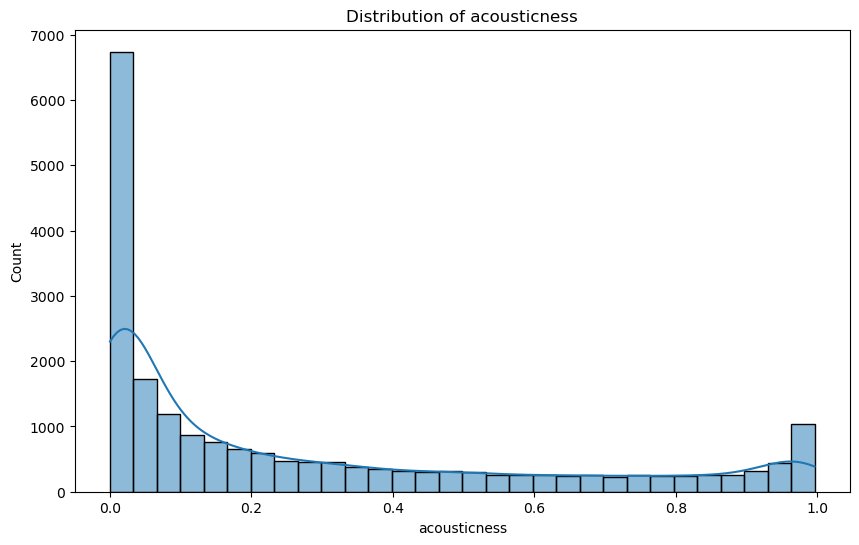

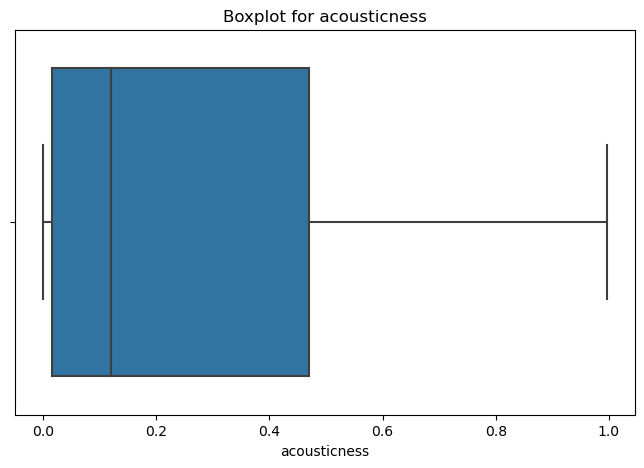

Number of outliers in acousticness: 0
Analysis for acousticness:
Mean: 0.27478340441355265
Median: 0.12
Standard Deviation: 0.32164334724527216
Minimum: 0.0
Maximum: 0.996
Number of Unique Values: 3616

Analyzing danceability...


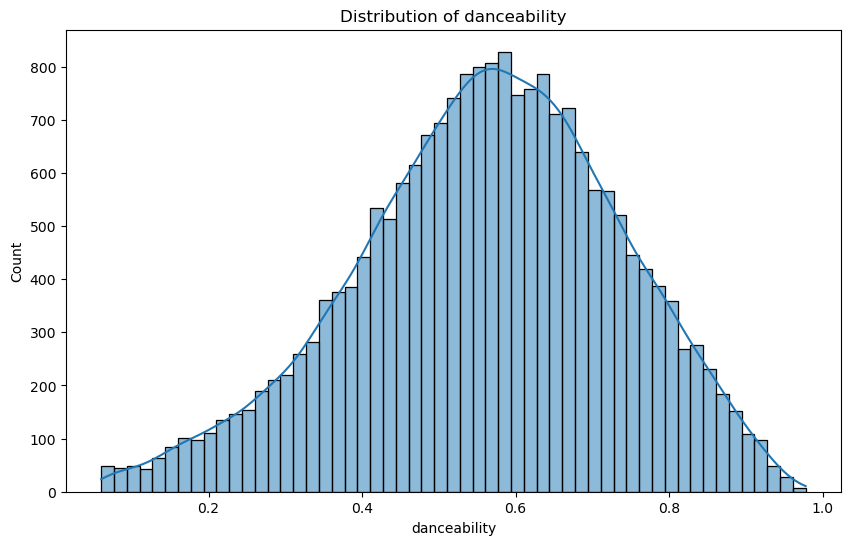

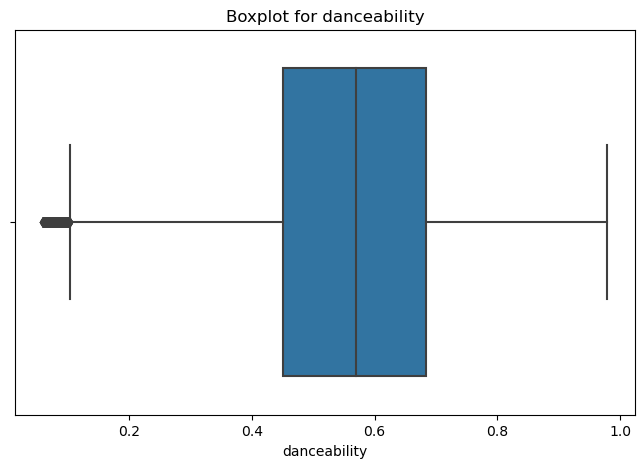

Number of outliers in danceability: 0
Analysis for danceability:
Mean: 0.5619828086692148
Median: 0.57
Standard Deviation: 0.17189757196659972
Minimum: 0.06
Maximum: 0.978
Number of Unique Values: 950

Analyzing duration_ms...


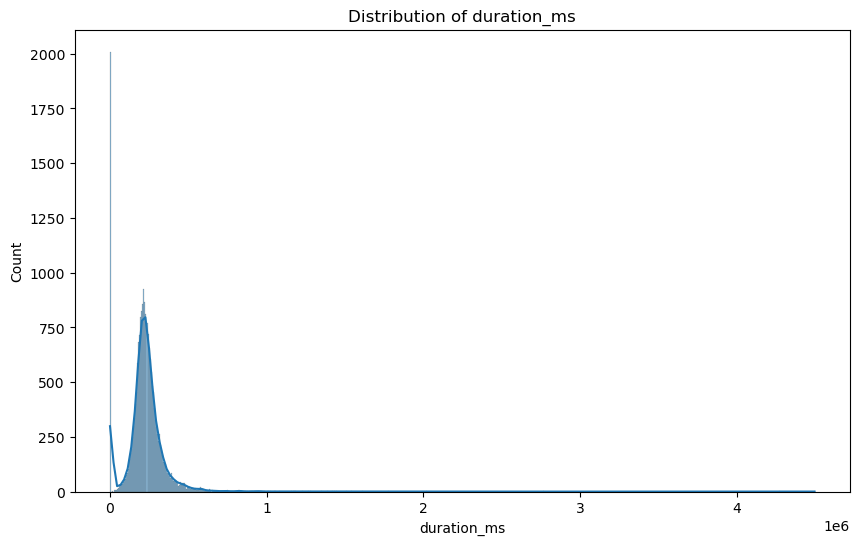

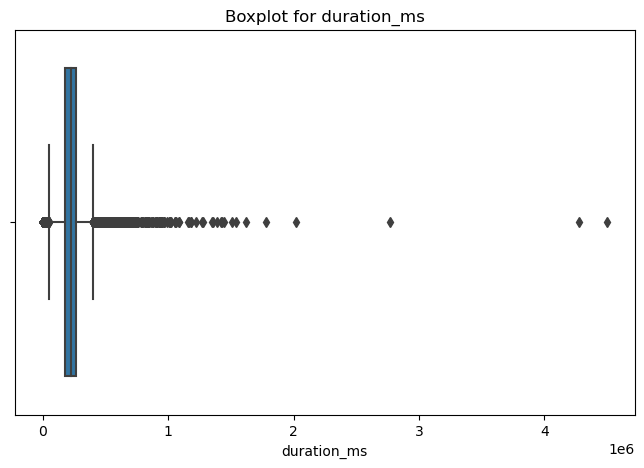

Number of outliers in duration_ms: 160
Analysis for duration_ms:
Mean: 220375.62229086985
Median: 219533.0
Standard Deviation: 126727.9835172244
Minimum: 1.0
Maximum: 4497994.0
Number of Unique Values: 13649

Analyzing energy...


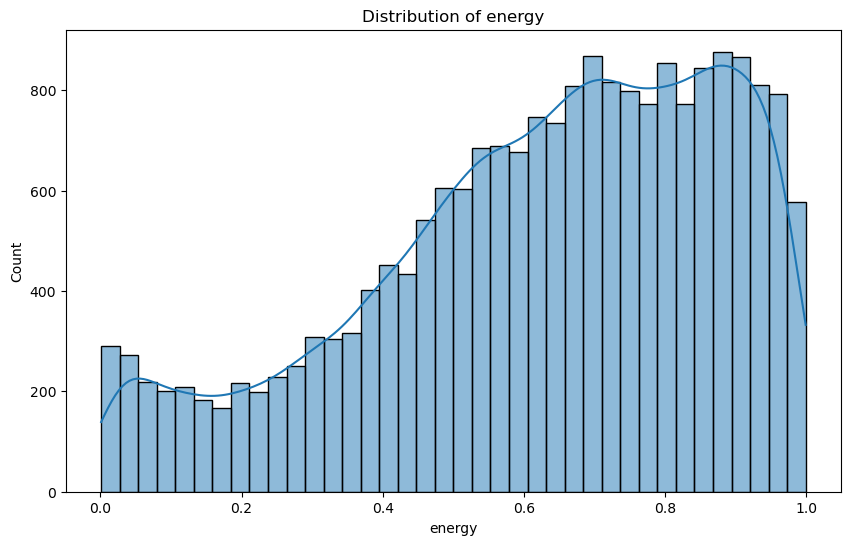

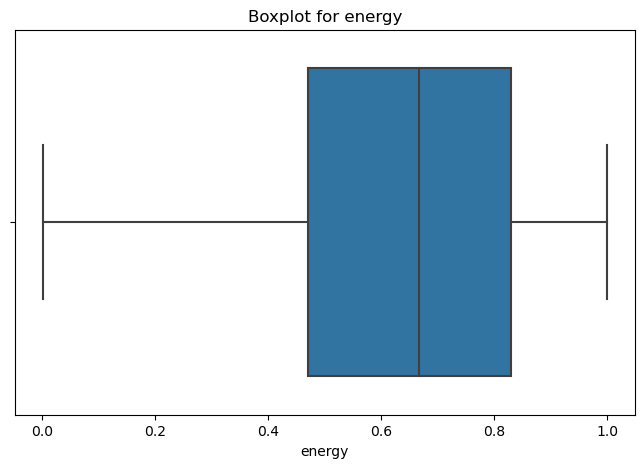

Number of outliers in energy: 0
Analysis for energy:
Mean: 0.6252761915269178
Median: 0.6659999999999999
Standard Deviation: 0.25123765460349107
Minimum: 0.00101
Maximum: 0.999
Number of Unique Values: 1521

Analyzing instrumentalness...


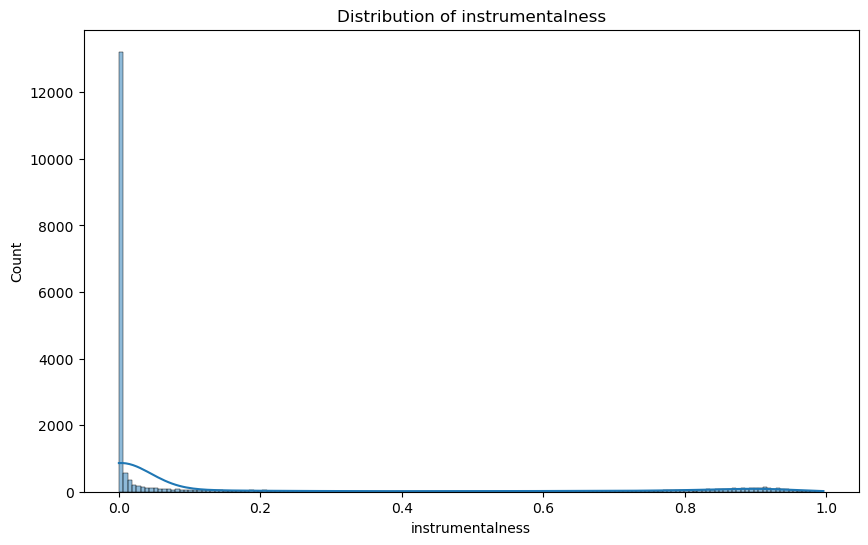

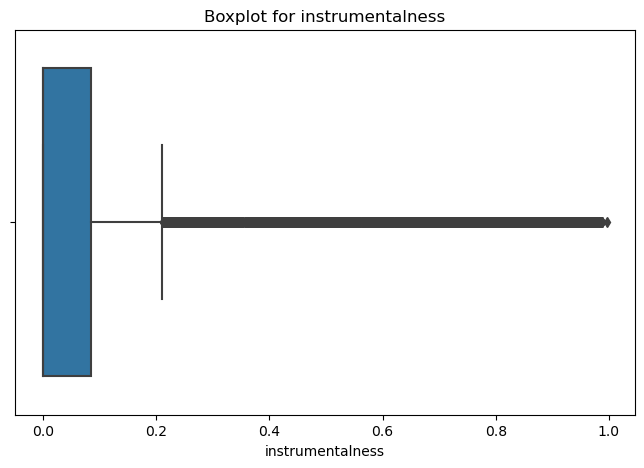

Number of outliers in instrumentalness: 0
Analysis for instrumentalness:
Mean: 0.1599888987633616
Median: 0.000144
Standard Deviation: 0.3065028391822661
Minimum: 0.0
Maximum: 0.996
Number of Unique Values: 4360

Analyzing liveness...


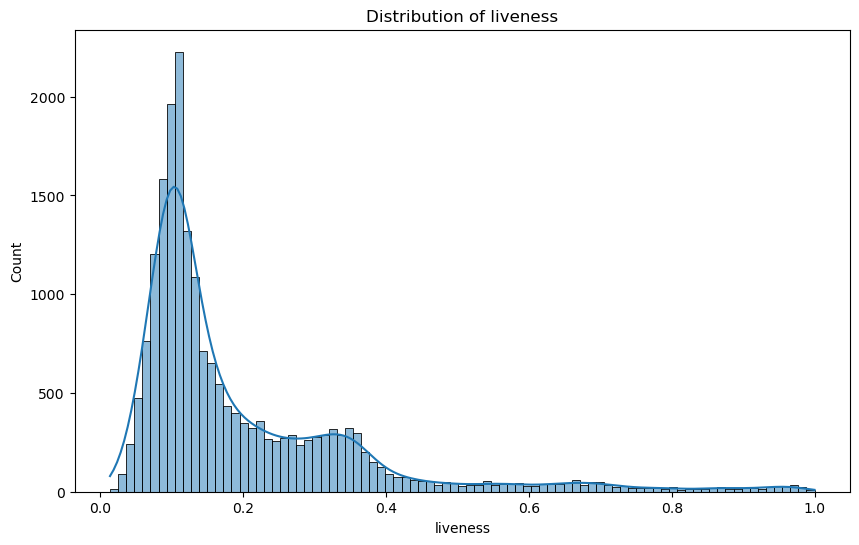

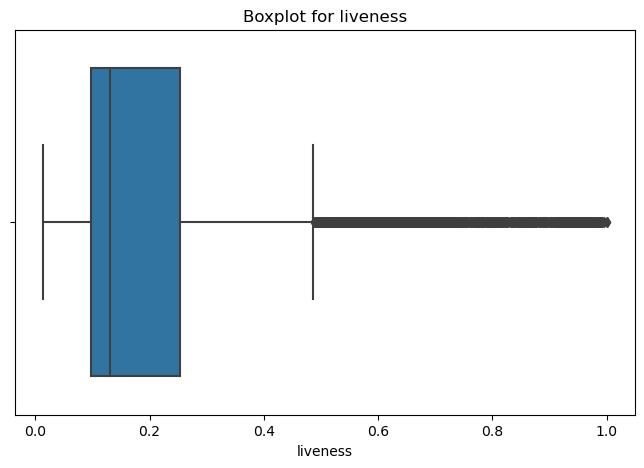

Number of outliers in liveness: 561
Analysis for liveness:
Mean: 0.19854045307443505
Median: 0.13
Standard Deviation: 0.16674243092650232
Minimum: 0.0136
Maximum: 1.0
Number of Unique Values: 1521

Analyzing loudness...


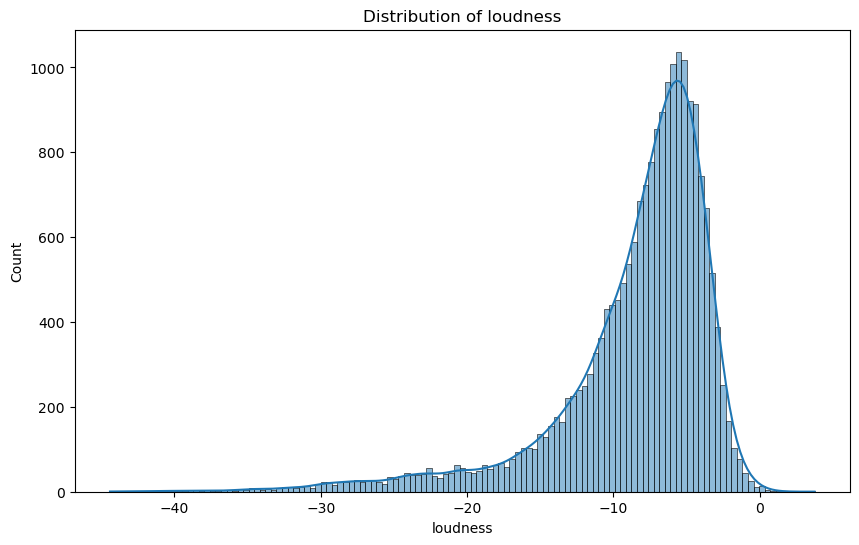

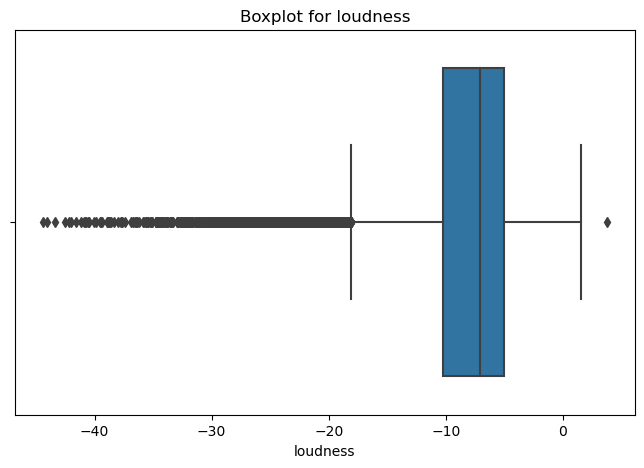

Number of outliers in loudness: 489
Analysis for loudness:
Mean: -8.55299794057077
Median: -7.0520000000000005
Standard Deviation: 5.4999166342113295
Minimum: -44.406000000000006
Maximum: 3.744
Number of Unique Values: 10844

Analyzing speechiness...


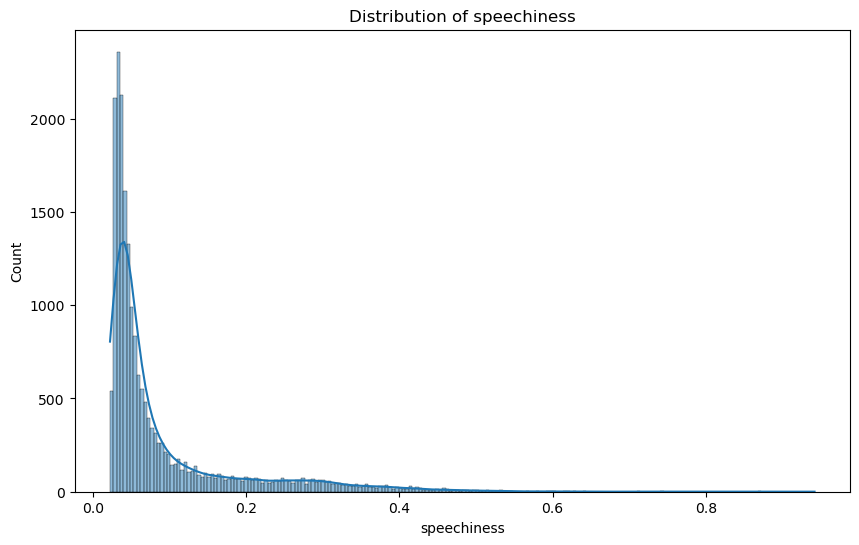

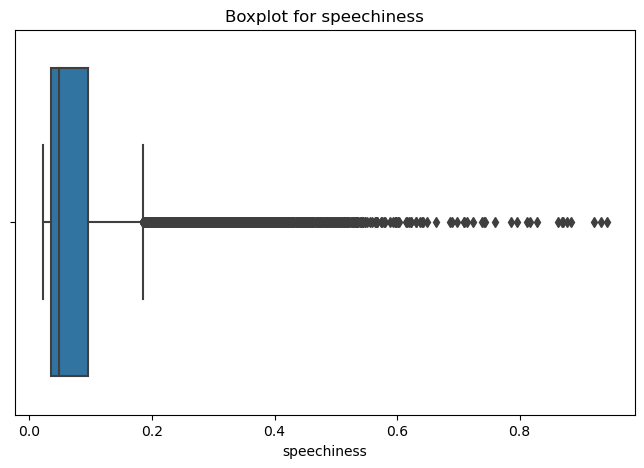

Number of outliers in speechiness: 469
Analysis for speechiness:
Mean: 0.09135166225360412
Median: 0.049049999999999996
Standard Deviation: 0.09773515688792143
Minimum: 0.0223
Maximum: 0.942
Number of Unique Values: 1243

Analyzing tempo...


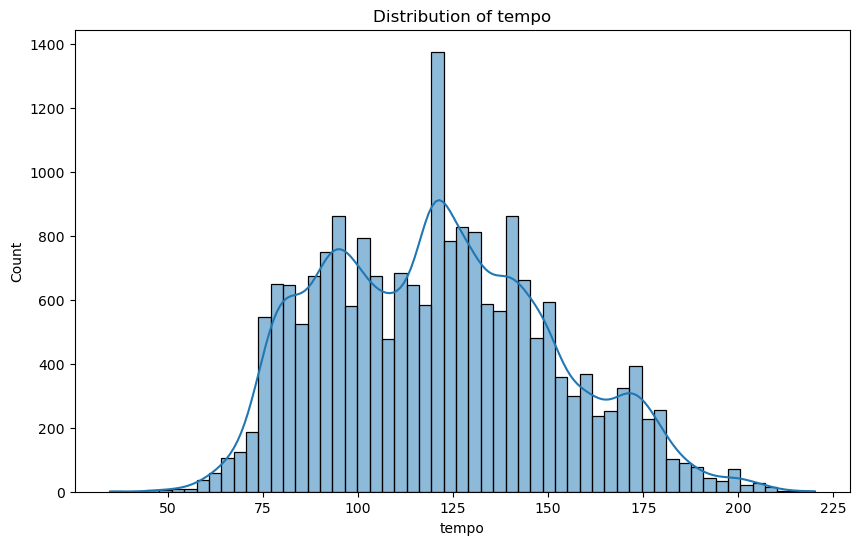

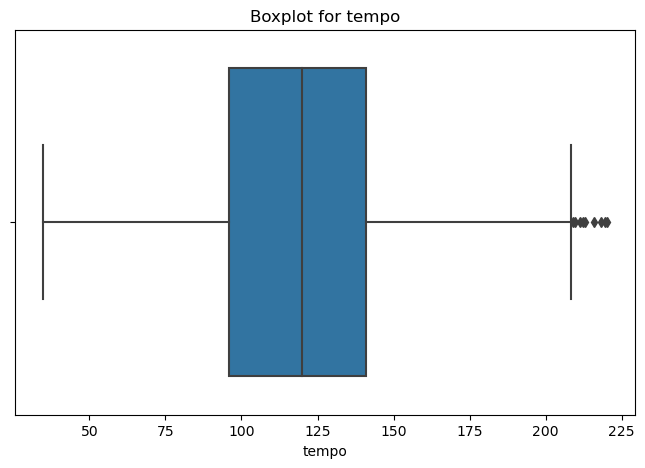

Number of outliers in tempo: 7
Analysis for tempo:
Mean: 120.92205173090053
Median: 119.998
Standard Deviation: 30.096352245522223
Minimum: 34.765
Maximum: 220.041
Number of Unique Values: 15762

Analyzing valence...


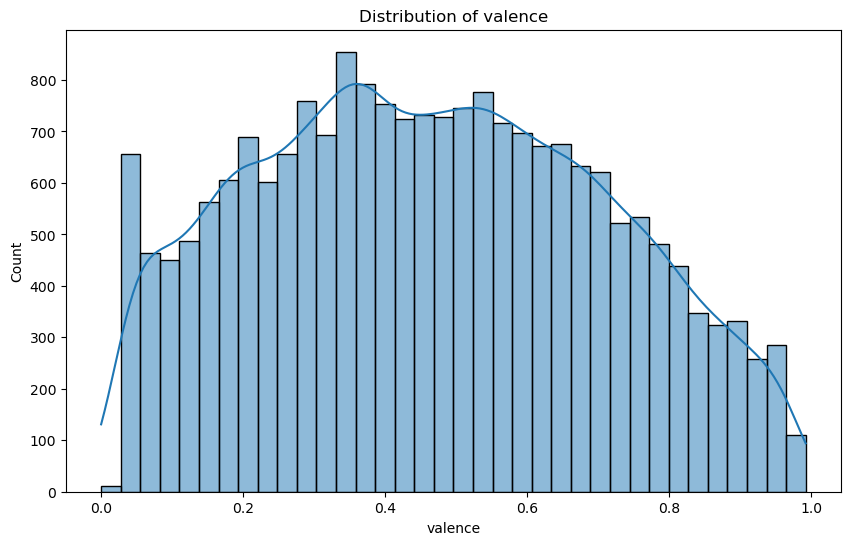

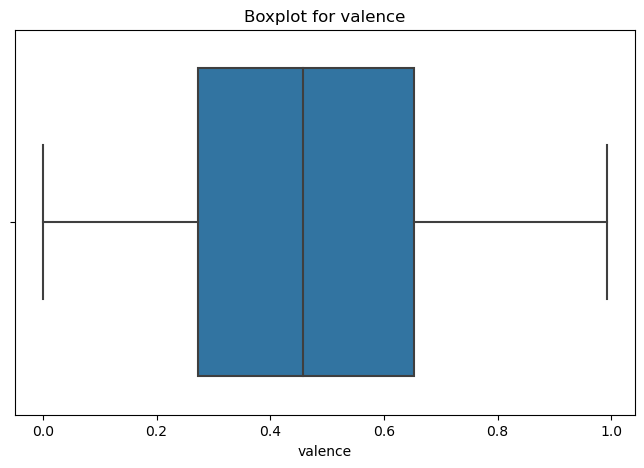

Number of outliers in valence: 0
Analysis for valence:
Mean: 0.4645876140041181
Median: 0.457
Standard Deviation: 0.24338678887671936
Minimum: 0.0
Maximum: 0.992
Number of Unique Values: 1454


In [12]:
# Функция для поиска выбросов
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Функция для анализа числового столбца
def analyze_numerical_column(column_name, data):
    # Основные статистические метрики
    stats_metrics = data[column_name].describe()

    # Количество уникальных значений
    num_unique_values = data[column_name].nunique()

    # Визуализация распределения
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

    # Проверка выбросов с использованием boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.show()

    # Проверка выбросов с использованием Z-оценки
    z_scores = stats.zscore(data[column_name])
    outliers = (z_scores > 3) | (z_scores < -3)
    num_outliers = sum(outliers)
    print(f'Number of outliers in {column_name}: {num_outliers}')

    # Вывод основных статистических метрик
    print(f"Analysis for {column_name}:")
    print(f"Mean: {stats_metrics['mean']}")
    print(f"Median: {data[column_name].median()}")
    print(f"Standard Deviation: {stats_metrics['std']}")
    print(f"Minimum: {stats_metrics['min']}")
    print(f"Maximum: {stats_metrics['max']}")
    print(f"Number of Unique Values: {num_unique_values}")

# Числовые столбцы для анализа
numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Анализ и проверка каждого числового столбца
for column in numeric_columns:
    print(f"\nAnalyzing {column}...")
    analyze_numerical_column(column, train_data)

Вывод по анализу числовых столбцов:

acousticness:

 * Количество выбросов: 0
 * Среднее значение: 0.275
 * Медиана: 0.12
 * Стандартное отклонение: 0.322
 * Минимум: 0.0, Максимум: 0.996
 * Уникальных значений: 3616
 
danceability:

 * Количество выбросов: 0
 * Среднее значение: 0.562
 * Медиана: 0.57
 * Стандартное отклонение: 0.172
 * Минимум: 0.06, Максимум: 0.978
 * Уникальных значений: 950

duration_ms:

 * Количество выбросов: 160
 * Среднее значение: 220376
 * Медиана: 219533
 * Стандартное отклонение: 126728
 * Минимум: 1, Максимум: 4497994
 * Уникальных значений: 13649

energy:

 * Количество выбросов: 0
 * Среднее значение: 0.625
 * Медиана: 0.666
 * Стандартное отклонение: 0.251
 * Минимум: 0.00101, Максимум: 0.999
 * Уникальных значений: 1521


valence:

 * Количество выбросов: 0
 * Среднее значение: 0.465
 * Медиана: 0.457
 * Стандартное отклонение: 0.243
 * Минимум: 0.0, Максимум: 0.992
 * Уникальных значений: 1454

Общий вывод: В данных присутствуют различные распределения и характеристики для каждого числового столбца. Некоторые столбцы, такие как 'duration_ms', 'liveness', 'loudness' и 'speechiness', содержат выбросы, которые могут потребовать дополнительного внимания при дальнейшем анализе.

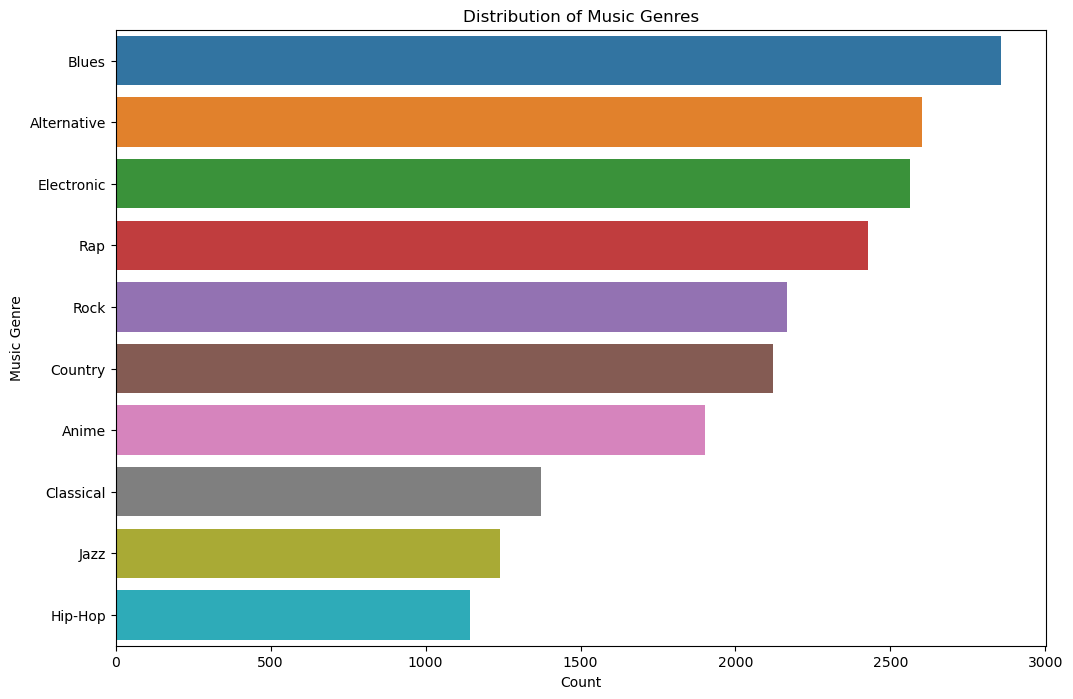

In [13]:
# Оценки распределения жанров
genre_column = 'music_genre'

# Суммирование количества по каждому жанру
genre_distribution = train_data[genre_column].value_counts()

# Визуализация распределения жанров
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_distribution.values, y=genre_distribution.index)
plt.title('Distribution of Music Genres')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.show()

In [14]:
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   instance_id                  track_name  acousticness  danceability  \
0        25143                  Highwayman        0.4800         0.670   
1        26091       Toes Across The Floor        0.2430         0.452   
2        87888       First Person on Earth        0.2280         0.454   
3        77021  No Te Veo - Digital Single        0.0558         0.847   
4        20852             Chasing Shadows        0.2270         0.742   

   duration_ms  energy  instrumentalness  liveness  loudness  speechiness  \
0     182653.0   0.351          0.017600     0.115   -16.842       0.0463   
1     187133.0   0.670          0.000051     0.108    -8.392       0.0352   
2     173448.0   0.804          0.000000     0.181    -5.225       0.3710   
3     255987.0   0.873          0.000003     0.325    -4.805       0.0804   
4     195333.0   0.575          0.000002     0.176    -5.550       0.0487   

   ...  key_C# key_D  key_D# key_E  key_F  key_F#  key_G  key_G#  mode_Major  \


In [15]:
# Статистические метрики для числовых столбцов
numeric_stats = train_data.describe()

# Вывод результатов
print("Распределение жанров:")
print(genre_distribution)

print("\nСтатистические метрики для числовых столбцов:")
print(numeric_stats)

Распределение жанров:
Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: music_genre, dtype: int64

Статистические метрики для числовых столбцов:
        instance_id  acousticness  danceability   duration_ms        energy  \
count  20394.000000  20394.000000  20394.000000  2.039400e+04  20394.000000   
mean   55973.846916      0.274783      0.561983  2.203756e+05      0.625276   
std    20695.792545      0.321643      0.171898  1.267280e+05      0.251238   
min    20011.000000      0.000000      0.060000  1.000000e+00      0.001010   
25%    38157.250000      0.015200      0.451000  1.775170e+05      0.470000   
50%    56030.000000      0.120000      0.570000  2.195330e+05      0.666000   
75%    73912.750000      0.470000      0.683000  2.660000e+05      0.830000   
max    91758.000000      0.996000      0.978000  4.497994e+06      

Alternative имеет наибольшее количество экземпляров среди всех жанров (2601), что может указывать на популярность этого жанра в вашем наборе данных.

Blues также представлен значительным числом экземпляров (2858).

Electronic, Rock и Rap тоже имеют заметное количество представителей, соответственно, 2564, 2165 и 2428.

Другие жанры, такие как Anime, Classical, Country, Hip-Hop, Jazz, имеют более низкое количество экземпляров, но все равно значительное для анализа.

### Проверка на мультиколлинеарность:

In [16]:
# Выведем уникальные значения в каждом столбце
for column in train_data.columns:
    print(f"Уникальные значения в столбце {column}:\n{train_data[column].unique()}\n")

Уникальные значения в столбце instance_id:
[25143 26091 87888 ... 33350 77920 86375]

Уникальные значения в столбце track_name:
['Highwayman' 'Toes Across The Floor' 'First Person on Earth' ...
 'Original Prankster' '4Peat' 'Trouble (feat. MC Spyder)']

Уникальные значения в столбце acousticness:
[4.80e-01 2.43e-01 2.28e-01 ... 5.12e-02 8.95e-05 8.00e-06]

Уникальные значения в столбце danceability:
[0.67   0.452  0.454  0.847  0.742  0.308  0.655  0.591  0.647  0.537
 0.789  0.585  0.555  0.47   0.208  0.84   0.485  0.889  0.554  0.515
 0.595  0.494  0.693  0.586  0.681  0.768  0.154  0.628  0.533  0.767
 0.812  0.679  0.559  0.566  0.373  0.748  0.49   0.415  0.632  0.406
 0.862  0.608  0.582  0.878  0.188  0.369  0.437  0.55   0.478  0.482
 0.532  0.691  0.753  0.458  0.374  0.659  0.524  0.726  0.615  0.389
 0.392  0.795  0.476  0.399  0.242  0.552  0.926  0.466  0.73   0.662
 0.315  0.513  0.634  0.622  0.58   0.825  0.453  0.419  0.561  0.68
 0.252  0.496  0.505  0.824  0.489  0.

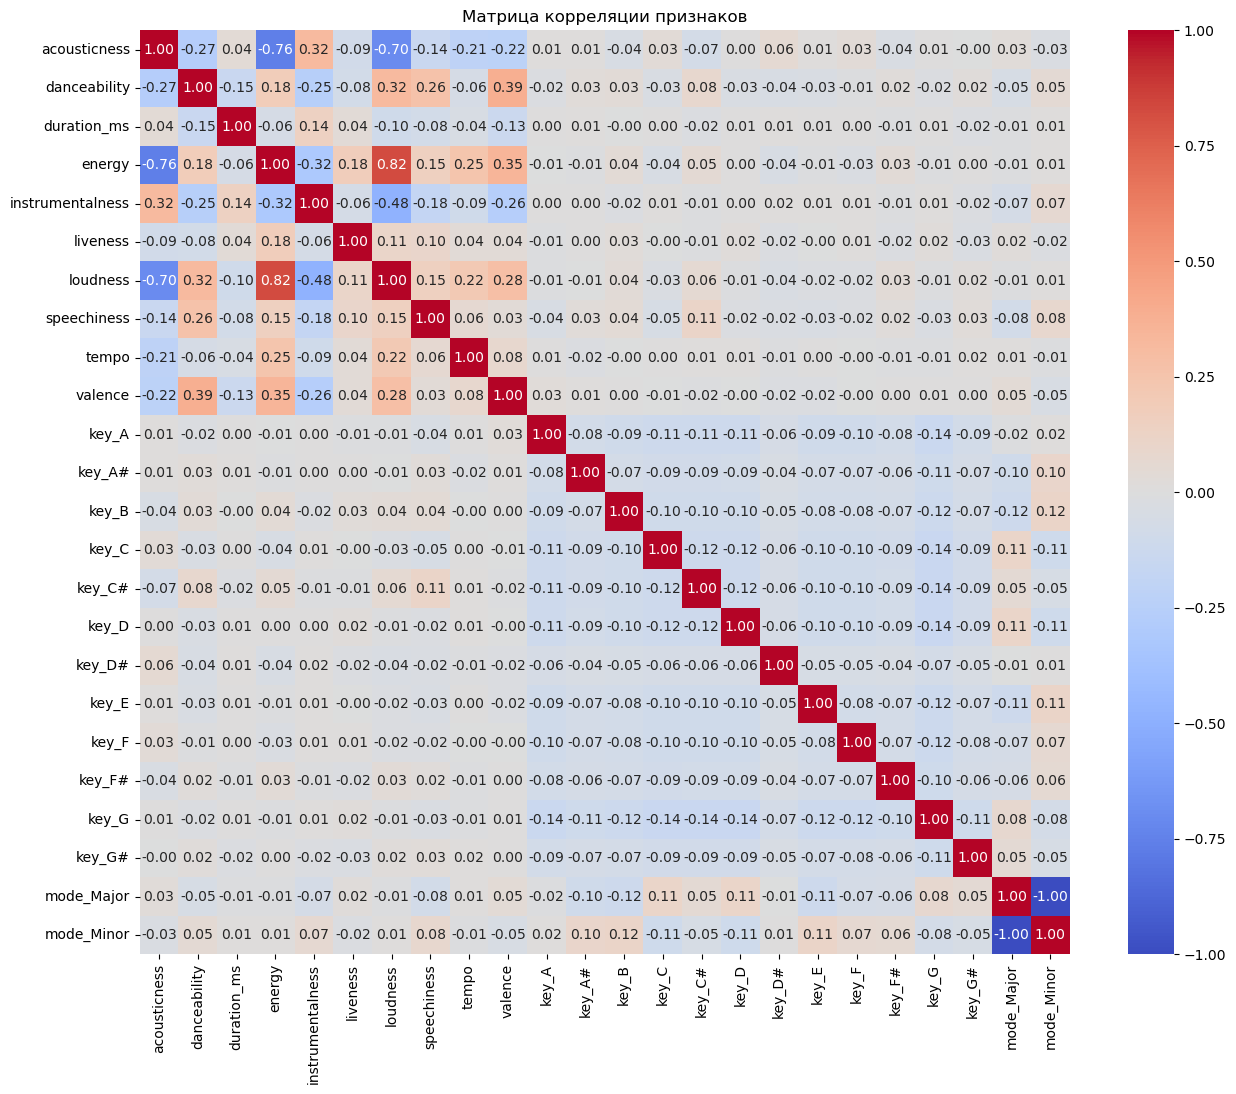

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Рассматриваем только числовые колонки
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])

# Рассчитываем матрицу корреляции
correlation_matrix = numeric_columns.corr()

# Создаем тепловую карту для визуализации корреляции
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции признаков")
plt.show()

In [18]:
# Удаление ненужных признаков
unwanted_columns = ['track_name']
train_data = train_data.drop(unwanted_columns, axis=1)
test_data = test_data.drop(unwanted_columns, axis=1)

train_data = train_data.drop('obtained_date', axis=1)
test_data = test_data.drop('obtained_date', axis=1)

## Выбор и обучение моделей:

In [19]:
# Выделение целевой переменной и признаков
X = train_data.drop(['music_genre'], axis=1)
y = train_data['music_genre']

# Разделение данных на обучающий и валидационный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)

In [20]:
# Определение гиперпараметров для Random Forest с помощью RandomizedSearchCV
param_dist = {'n_estimators': [200], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [20], 'min_samples_split': [10], 'min_samples_leaf': [2], 'bootstrap': [True, False]}

# Создание и обучение модели RandomForestClassifier с использованием RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = rf_random.best_params_
print(f'Best Hyperparameters: {best_params}')

# Предсказание на валидационном наборе
y_pred = rf_random.predict(X_valid)

# Оценка точности модели
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.4660455994116205


In [21]:
# Проверка наличия столбца 'instance_id' в тестовом наборе данных
if 'instance_id' not in test_data.columns:
    raise ValueError("Столбец 'instance_id' отсутствует в тестовом наборе данных.")

# Проверка совпадения признаков в тестовом наборе с теми, которые использовались при обучении модели
if set(X_train.columns) != set(test_data.columns):
    raise ValueError("Признаки в тестовом наборе данных отличаются от тех, которые использовались при обучении модели.")

# Прогнозирование для тестового набора данных
# Включаем 'instance_id' при прогнозировании
test_predictions = rf_random.predict(test_data)
# Создание DataFrame с предсказаниями
predictions_df = pd.DataFrame({'instance_id': test_data['instance_id'].astype(int), 'music_genre': test_predictions})

# Сохранение предсказаний в файл
predictions_df.to_csv('predictions.csv', index=False)

In [22]:
### Создание и обучение модели логистической регрессии:

In [23]:
# Создание и обучение модели логистической регрессии
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Предсказание на валидационном наборе
y_pred_logreg = logreg.predict(X_valid)

# Оценка точности модели логистической регрессии
accuracy_logreg = accuracy_score(y_valid, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

Logistic Regression Accuracy: 0.15199803873498408


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Создание и обучение модели SVM:

In [24]:
# Создание и обучение модели SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Предсказание на валидационном наборе
y_pred_svm = svm.predict(X_valid)

# Оценка точности модели SVM
accuracy_svm = accuracy_score(y_valid, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.16180436381466046


In [25]:
# Получение важности признаков из Random Forest
feature_importance = rf_random.best_estimator_.feature_importances_

# Создание DataFrame для отображения важности признаков
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Сортировка по важности в порядке убывания
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print(importance_df)

             Feature  Importance
5   instrumentalness    0.122083
8        speechiness    0.105658
7           loudness    0.105373
2       danceability    0.105045
1       acousticness    0.100182
4             energy    0.093872
10           valence    0.078248
3        duration_ms    0.066859
9              tempo    0.055388
6           liveness    0.052198
0        instance_id    0.046525
23        mode_Major    0.008606
24        mode_Minor    0.008384
21             key_G    0.006064
15            key_C#    0.005790
11             key_A    0.005157
16             key_D    0.005085
14             key_C    0.004986
19             key_F    0.004348
18             key_E    0.004216
13             key_B    0.004090
22            key_G#    0.003584
20            key_F#    0.003316
12            key_A#    0.003245
17            key_D#    0.001697


In [26]:
# Задаем набор гиперпараметров для Grid Search
param_grid = {
    'n_estimators': [20, 50, 70],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем модель RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Используем GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Оцениваем точность на валидационном наборе с использованием лучших параметров
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_valid)
accuracy_grid = accuracy_score(y_valid, y_pred_grid)
print(f'Accuracy после Grid Search: {accuracy_grid}')

Лучшие гиперпараметры: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 70}
Accuracy после Grid Search: 0.464574650649669


### Отчет о качестве предсказания лучшей модели

#### Random Forest
Гиперпараметры:
 * n_estimators: 200
 * min_samples_split: 10
 * min_samples_leaf: 2
 * max_depth: 20
 * bootstrap: True

Оценка качества:
 * Accuracy: 0.4606

Logistic Regression
 * Accuracy: 0.152

SVM
 * Accuracy: 0.162


Отчет по анализу важности признаков в музыкальном жанре
Введение
В данном отчете я провел(а) анализ важности признаков для прогнозирования музыкального жанра с использованием модели Random Forest. Результаты анализа основаны на весах, присвоенных каждому признаку после обучения модели.

Важность признаков
instrumentalness (0.1220):

Этот признак имеет наивысший вес, что может указывать на его существенное влияние на определение музыкального жанра. Возможно, степень инструментальности сильно влияет на результат.
speechiness (0.1056):

С высоким весом этот признак также заслуживает внимания. Вероятно, степень "словесности" в музыке оказывает влияние на жанр.
danceability (0.1050):

Этот признак также имеет существенный вес, что может свидетельствовать о его важности для определения музыкального жанра.
loudness (0.1053):

Громкость, судя по весу, считается важным фактором для прогнозирования жанра музыки.
acousticness (0.1001):

С высоким весом, акустичность также оказывает существенное воздействие на определение музыкального жанра.

#### Выводы
Эти результаты позволяют лучше понять, какие характеристики музыки оказывают наибольшее влияние при определении ее жанра.